In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv("../Files/Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.drop(columns="User ID", inplace=True)

In [6]:
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [8]:
df['Gender'] = df['Gender'].map({"Male" : 1, "Female" : 0})

In [9]:
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [25]:
X = df.drop(columns="Purchased")
y = df['Purchased']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=23)

In [31]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [32]:
model = LogisticRegression()

In [33]:
model.fit(X_train, y_train)

LogisticRegression()

In [34]:
y_pred = model.predict(X_test)

In [35]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[46  4]
 [ 9 21]]
0.8375


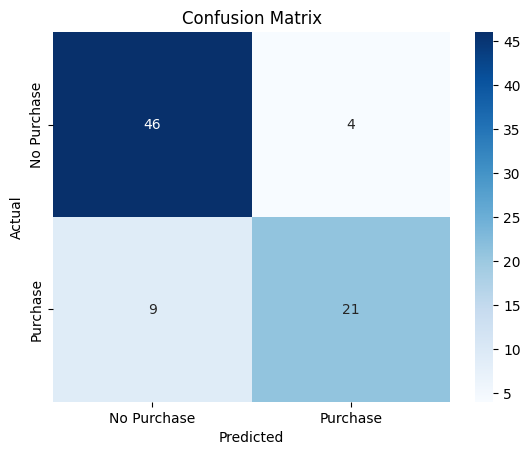

In [40]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", xticklabels=["No Purchase","Purchase"], yticklabels=["No Purchase", "Purchase"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [48]:
new_data = np.array([[1, 30, 80000]])

new_data_df = pd.DataFrame(new_data, columns=X.columns)
print(new_data_df)

new_data_scaled = scaler.transform(new_data_df)
print(new_data_scaled)
prediction = model.predict(new_data_scaled)
print(prediction)



if prediction == 1:
    print("Purchase Prediction: Yes")
else:
    print("Purchase Prediction: No")

   Gender  Age  EstimatedSalary
0       1   30            80000
[[ 0.95118973 -0.72286086  0.25911789]]
[0]
Purchase Prediction: No
